In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

qualifying_results_df = pd.read_csv('../f1db_data/f1db-races-qualifying-results.csv')
qualifying_results_df


,raceId,year,round,positionDisplayOrder,positionNumber,positionText,driverNumber,driverId,constructorId,engineManufacturerId,...,q1Millis,q2,q2Millis,q3,q3Millis,gap,gapMillis,interval,intervalMillis,laps
0,1,1950,1,1,1.0,1,2,nino-farina,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1950,1,2,2.0,2,3,luigi-fagioli,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,+0.200,200.0,+0.200,200.0,NaN
2,1,1950,1,3,3.0,3,1,juan-manuel-fangio,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,+0.200,200.0,+0.000,0.0,NaN
3,1,1950,1,4,4.0,4,4,reg-parnell,alfa-romeo,alfa-romeo,...,NaN,NaN,NaN,NaN,NaN,+1.400,1400.0,+1.200,1200.0,NaN
4,1,1950,1,5,5.0,5,21,birabongse-bhanudej,maserati,maserati,...,NaN,NaN,NaN,NaN,NaN,+1.800,1800.0,+0.400,400.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26291,1128,2025,3,16,16.0,16,27,nico-hulkenberg,kick-sauber,ferrari,...,88570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
26292,1128,2025,3,17,17.0,17,5,gabriel-bortoleto,kick-sauber,ferrari,...,88622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
26293,1128,2025,3,18,18.0,18,31,esteban-ocon,haas,ferrari,...,88696.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
26294,1128,2025,3,19,19.0,19,7,jack-doohan,alpine,renault,...,88877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [24]:
pole_position = qualifying_results_df[qualifying_results_df['positionNumber'] == 1]
pole_count = pole_position.groupby(['positionNumber', 'driverId']).size().reset_index(name = 'count')
pole_count = pole_count.sort_values(by = ['count'], ascending = False)
pole_count

,positionNumber,driverId,count
65,1.0,lewis-hamilton,105
70,1.0,michael-schumacher,69
4,1.0,ayrton-senna,65
96,1.0,sebastian-vettel,57
69,1.0,max-verstappen,45
...,...,...,...
77,1.0,nico-hulkenberg,1
13,1.0,cliff-allison,1
82,1.0,oscar-piastri,1
83,1.0,pastor-maldonado,1


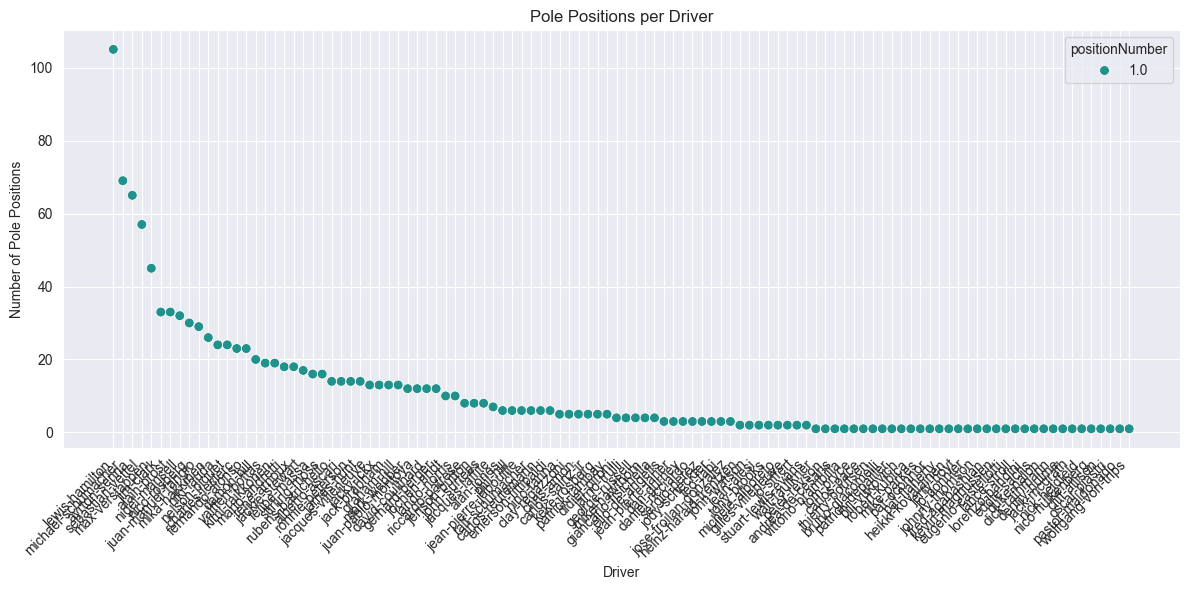

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pole_count, x='driverId', y='count', size='positionNumber', sizes=(50, 500), hue='positionNumber', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Driver')
plt.ylabel('Number of Pole Positions')
plt.title('Pole Positions per Driver')
plt.tight_layout()
plt.show()